# Projeto de Descoberta de Fraudes no consumo de Água com Deep Learning💧

## Empresa parceira: Aegea Saneamento

- Abaixo você irá encontrar descrições sobre a problemática relacionada ao projeto e o nosso objetivo e benefícios que esperamos alcançar. 👇

#### Problemática base 🚨

A fraude no consumo de água é um grande desafio enfrentado pela empresa e qualquer empresa de prestação de serviços de saneamento. Esse problema afeta tanto o faturamento e a arrecadação da empresa, quanto a qualidade do serviço de abastecimento de água.

A fraude acontece quando um consumidor manipula o instrumento de medição de consumo de água, chamado hidrômetro, realiza ligações clandestinas ou qualquer forma de adulteração que reduza ou até mesmo elimine os valores cobrados pelo consumo real.

As práticas acima descritas, além de causarem perdas econômicas para Aegea, também geram impactos na qualidade do abastecimento de água à população, comprometendo a eficiência e a integridade física da infraestrutura de distribuição de água.

#### Impactos 📊

- Danos a tubulações resultando em vazamentos, resultando em perda de água e alteração na pressão da rede de distribuição de água.
- Intermitência no abastecimento de água à população.
- Redução de valores faturados e, consequentemente, diminuição de receita.
- Aumento do risco de contaminação da água, uma vez que métodos fraudulentos não seguem padrões de segurança, possibilitando a presença de contaminantes nas redes de abastecimento.

#### Mediação 🔍

Para combater esse problema, atualmente existem diversas estratégias aplicadas na empresa, desde verificar alterações no padrão de consumo dos clientes até apontamentos de agentes de campo. Em todos os casos existem equipes especializadas em fiscalizar e sanar quaisquer fraudes que sejam detectadas. A atuação dessas equipes é delimitada diariamente por uma lista de alvos para fiscalização.

Diante do cenário acima descrito, deseja-se o desenvolvimento de uma aplicação que melhore a assertividade da atuação da Aegea na detecção de fraudes em seu âmbito de atuação, construindo um modelo de Machine Learning que demonstre eficácia nos processos de negócio.

### Objetivo e Benefícios esperados ✅

- Determinar a probabilidade de um comportamento do consumo ser fraudulento ou não, considerando, de maneira holística, dados históricos de consumo e, caso necessário, a influência de variáveis exógenas, como índices macroeconômicos, climáticos, geográficos, dentre outros.

- Melhorar a capacidade de detecção e predição de fraudes de consumo de água dos consumidores nas áreas de atuação da Aegea. Compreender melhor elementos importantes para detecção e predição de fraudes nos clientes da Aegea

## **Integrantes do Grupo** 🚀
- Camila Anacleto
- Henri Harari
- Patrick Victorino
- Pedro Rezende
- Sophia Dias
- Vitória Rodrigues

---
# Sobre o notebook 🥸

## Objetivo: Rede Neural 🎯

O objetivo principal do desenvolvimento deste notebook é realizar a construção da rede neural, abrangendo um período de 2023 a agosto de 2024, como forma de identificar fraudes no consumo de água.

O dataset utilizado foi fornecido pela Aegea Saneamento e foi passado pela nossa pipeline de tratamento de dados, como forma de inputar de uma forma mais fácil ao modelo de rede neural.

# Implementando cuDF

- Aqui fazemos uma verificação para entender se uma GPU está sendo utilizada ou não.
- Para o projeto como um todo, desenvolvemos no Colab Pro, usando o tempo de execução em T4 GPU.

- O principal motivo de estarmos utilizando a GPU é para acelerar o processamento dos dados, visto que o cuDF é uma biblioteca que permite a manipulação de dados em GPU, o que torna o processamento mais rápido.
- Um exemplo claro disso é percebido no momento de aplicação da pipeline de tratamento dos dados, que é um processo que demanda um tempo considerável de execução. Porém, esse processo é fácilmente completado em menos de 1 minuto.

In [ ]:
!nvidia-smi

Fri Sep 20 11:25:49 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   64C    P8              11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
%load_ext cudf.pandas

# Importações dos dados e instalações de bibliotecas

In [3]:
%pip install -q -r requirements.txt

In [16]:
import pandas as pd
import numpy as np
import os
import re
from datetime import datetime
import gdown
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Flatten, Input, Dropout, BatchNormalization
from tensorflow.keras.metrics import BinaryAccuracy, AUC, Precision, Recall, Accuracy, TruePositives, TrueNegatives, FalsePositives, FalseNegatives
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam, Lion
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import backend as K
tf.random.set_seed(42)

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.decomposition import PCA
from scikeras.wrappers import KerasClassifier, KerasRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, KFold
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, make_scorer, accuracy_score

### Baixando dados

In [5]:
!gdown 1H29BaaYwIAcnxneLlbSwSP0D9M-XE7k2

Downloading...
From: https://drive.google.com/uc?id=1H29BaaYwIAcnxneLlbSwSP0D9M-XE7k2
To: /content/new_df_pipe.csv
100% 15.8M/15.8M [00:00<00:00, 44.9MB/s]


In [6]:
df = pd.read_csv('/content/new_df_pipe.csv')
df = df.drop(columns=['Unnamed: 0'])
df['DAT_LEITURA'] = pd.to_datetime(df['DAT_LEITURA'])
df['DAT_LEITURA'] = df['DAT_LEITURA'].dt.strftime('%Y-%m-%d')
df

,MATRICULA,DAT_LEITURA,ECO_RESIDENCIAL_CAT,ECO_COMERCIAL_CAT,ECO_INDUSTRIAL_CAT,ECO_PUBLICA_CAT,DIAS_LEITURA_CAT,CLUSTER_DSC_OCORRENCIA,CLUSTER_CONS_MEDIDO,TIPO_LIGACAO_CONSUMOFIXO,...,CATEGORIA_INDUSTRIAL,CATEGORIA_PUBLICA,CATEGORIA_RESIDENCIAL,non_fraud_count,fraud_count,FRAUDE,verao,outono,inverno,primavera
0,17919981,2023-08-14,1,0,0,0,0,0,0,0,...,0,0,1,19,0,0,0,0,1,0
1,17891473,2024-02-09,1,0,0,0,0,0,18,0,...,0,0,1,20,0,0,1,0,0,0
2,17829481,2024-04-23,1,0,0,0,0,0,18,0,...,0,0,1,19,0,0,0,1,0,0
3,17475442,2023-09-11,1,0,0,0,0,0,0,0,...,0,0,1,20,0,0,0,0,0,1
4,17811518,2023-05-11,1,0,0,0,0,0,18,0,...,0,0,1,20,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176007,17256798,2024-02-10,1,0,0,0,0,1,18,0,...,0,0,1,18,1,1,1,0,0,0
176008,17109540,2024-02-16,0,1,0,0,0,2,18,0,...,0,0,0,16,3,1,1,0,0,0
176009,17377265,2024-02-17,0,1,0,0,0,1,18,0,...,0,0,0,17,2,1,1,0,0,0
176010,17839579,2024-02-14,0,1,0,0,0,1,18,0,...,0,0,0,15,4,1,1,0,0,0


# Separação treino e teste

- Aqui nós iremos olhar um pouco para o conteúdo do dataset, certificando os dados contidos, se está tudo igual ao dataset de pipeline de tratamento

In [7]:
df.head()

,MATRICULA,DAT_LEITURA,ECO_RESIDENCIAL_CAT,ECO_COMERCIAL_CAT,ECO_INDUSTRIAL_CAT,ECO_PUBLICA_CAT,DIAS_LEITURA_CAT,CLUSTER_DSC_OCORRENCIA,CLUSTER_CONS_MEDIDO,TIPO_LIGACAO_CONSUMOFIXO,...,CATEGORIA_INDUSTRIAL,CATEGORIA_PUBLICA,CATEGORIA_RESIDENCIAL,non_fraud_count,fraud_count,FRAUDE,verao,outono,inverno,primavera
0,17919981,2023-08-14,1,0,0,0,0,0,0,0,...,0,0,1,19,0,0,0,0,1,0
1,17891473,2024-02-09,1,0,0,0,0,0,18,0,...,0,0,1,20,0,0,1,0,0,0
2,17829481,2024-04-23,1,0,0,0,0,0,18,0,...,0,0,1,19,0,0,0,1,0,0
3,17475442,2023-09-11,1,0,0,0,0,0,0,0,...,0,0,1,20,0,0,0,0,0,1
4,17811518,2023-05-11,1,0,0,0,0,0,18,0,...,0,0,1,20,0,0,0,1,0,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176012 entries, 0 to 176011
Data columns (total 22 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   MATRICULA                  176012 non-null  int64 
 1   DAT_LEITURA                175765 non-null  object
 2   ECO_RESIDENCIAL_CAT        176012 non-null  int64 
 3   ECO_COMERCIAL_CAT          176012 non-null  int64 
 4   ECO_INDUSTRIAL_CAT         176012 non-null  int64 
 5   ECO_PUBLICA_CAT            176012 non-null  int64 
 6   DIAS_LEITURA_CAT           176012 non-null  int64 
 7   CLUSTER_DSC_OCORRENCIA     176012 non-null  int64 
 8   CLUSTER_CONS_MEDIDO        176012 non-null  int64 
 9   TIPO_LIGACAO_CONSUMOFIXO   176012 non-null  int64 
 10  TIPO_LIGACAO_HIDROMETRADO  176012 non-null  int64 
 11  CATEGORIA_COMERCIAL        176012 non-null  int64 
 12  CATEGORIA_INDUSTRIAL       176012 non-null  int64 
 13  CATEGORIA_PUBLICA          176012 non-null  

- Estamos fazendo um reorganização dos dados para separar corretamente em features e target.
- Lembrando que não utilizamos algumas colunas para features, muitas delas são somente para um filtro ou uma análise

In [9]:
df['DAT_LEITURA'] = pd.to_datetime(df['DAT_LEITURA'])

df['mes'] = df['DAT_LEITURA'].dt.month
df['ano'] = df['DAT_LEITURA'].dt.year

# Ordenar os dados por matrícula e ano/mês
df = df.sort_values(by=['MATRICULA', 'ano', 'mes'])

In [10]:
# Selecionar as colunas que serão usadas no modelo
features = [col for col in df.columns if col not in ['MATRICULA', 'DAT_LEITURA', 'mes', 'ano', 'FRAUDE']]

# A variável que desejamos prever (alvo) é a coluna 'FRAUDADOR'
target = 'FRAUDE'

# Separar as features e o target
X = df[features].values
y = df[target].values

In [11]:
# Dividindo em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,  random_state=42)

# Compilação do modelo e estruturação da rede

- Aqui estamos fazendo a estruturação da rede do modelo, encapsulamos em funções, de forma a podermos alterar livremente sua estrutura sem afetar nenhum código abaixo.

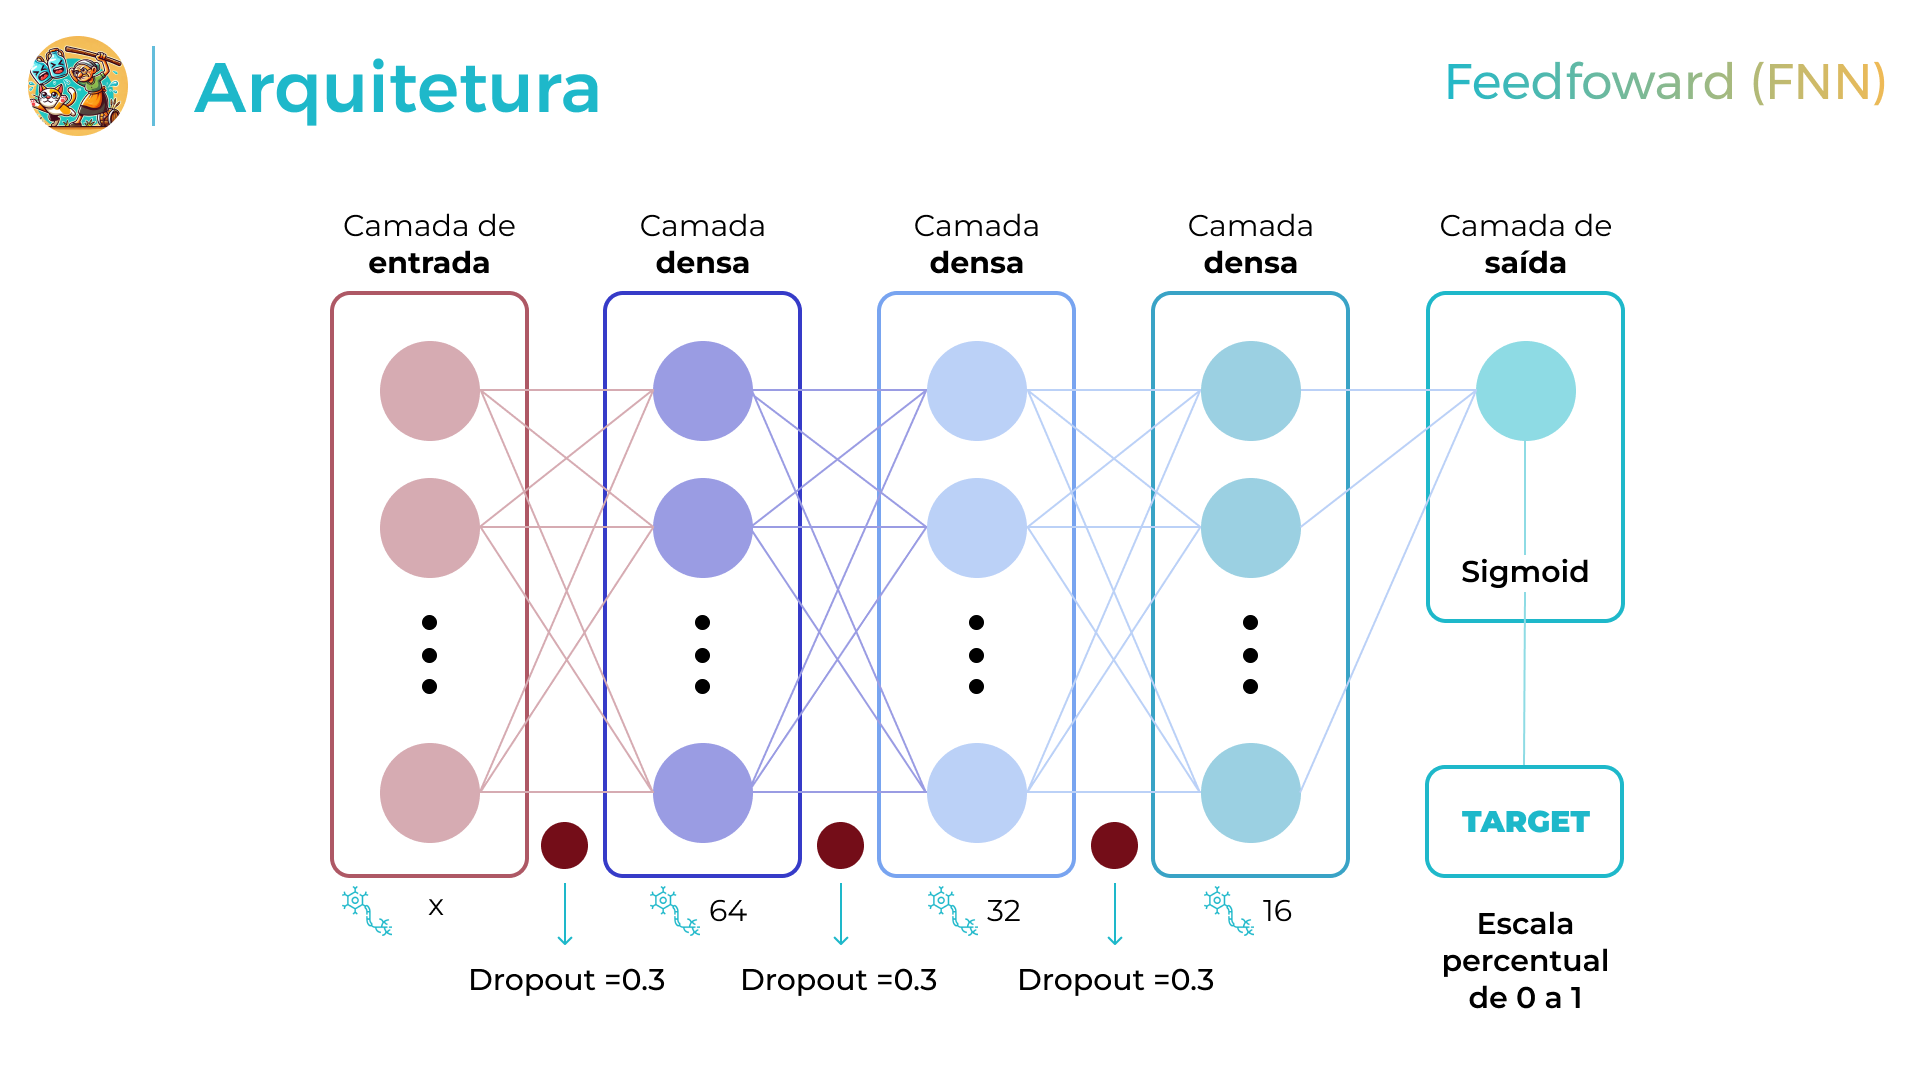

In [20]:
def create_model():
  # Define a arquitetura do modelo (arquitetura em pirâmide)
  return Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(16, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
  ])

- Aqui fazemos a adição de análise de algumas métricas que queremos ver de output do modelo

In [21]:
model = create_model()

precision = tf.keras.metrics.Precision()
recall = tf.keras.metrics.Recall()

# Compilando o modelo
model.compile(
      optimizer= Adam(learning_rate=0.0001),
      loss='binary_crossentropy',
      metrics=['accuracy', Precision(), Recall(), AUC()])

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                      │ (None, 64)                  │           1,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 16)                  │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,353 (17.00 KB)

 Trainable params: 4,129 (16.13 KB)

 Non-trainable params: 224 (896.00 B)

In [22]:
# Definindo o early stopping
earlyStop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True) # aqui demonstra a utilização do early stopping, servirá para parar em um número suficiente de épocas

accuracies = []
precisions = []
recalls = []
aucs = []
f1_scores = []

# Aplicação do dataset na rede e Treinamento

- testar rodar o modelo, tirando o earlystopping

In [23]:
# Treinando o modelo
# k_folds = 10
# kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

history = model.fit(X_train,
                    y_train,
                    epochs=25,
                    batch_size=128,
                    verbose=1,
                    callbacks=[earlyStop],
                    validation_data=(X_test, y_test))

Epoch 1/25
963/963 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.6620 - auc_1: 0.7158 - loss: 0.6691 - precision_4: 0.6955 - recall_4: 0.5827 - val_accuracy: 0.8906 - val_auc_1: 0.9541 - val_loss: 0.2806 - val_precision_4: 0.8933 - val_recall_4: 0.8864
Epoch 2/25
963/963 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8580 - auc_1: 0.9251 - loss: 0.3617 - precision_4: 0.8715 - recall_4: 0.8419 - val_accuracy: 0.9299 - val_auc_1: 0.9571 - val_loss: 0.2187 - val_precision_4: 0.8817 - val_recall_4: 0.9926
Epoch 3/25
963/963 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8986 - auc_1: 0.9440 - loss: 0.2910 - precision_4: 0.8807 - recall_4: 0.9236 - val_accuracy: 0.9330 - val_auc_1: 0.9577 - val_loss: 0.2104 - val_precision_4: 0.8828 - val_recall_4: 0.9981
Epoch 4/25
963/963 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9115 - auc_1: 0.9466 - loss: 0.2658 - precision_4: 0.8828 - recall_4: 0.9502 - val_accuracy: 0.9335 - val_auc_1: 0.9580 - val_loss: 0.2061 - val_precision_4: 0.8832 - val_

In [24]:
# Avaliar o modelo no conjunto de validação
val_loss, val_accuracy, val_precision, val_recall, val_auc = model.evaluate(X_test, y_test)
f1_score = 2 * (val_precision * val_recall) / (val_precision + val_recall)
# Armazenar as métricas para este fold
accuracies.append(val_accuracy)
precisions.append(val_precision)
recalls.append(val_recall)
aucs.append(val_auc)
f1_scores.append(f1_score)

# Calcular as métricas médias após a validação cruzada
print(f"Mean Accuracy: {np.mean(accuracies):.4f}")
print(f"Mean Precision: {np.mean(precisions):.4f}")
print(f"Mean Recall: {np.mean(recalls):.4f}")
print(f"Mean AUC: {np.mean(aucs):.4f}")
print(f"Mean F1 Score: {np.mean(f1_scores):.4f}")

1651/1651 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9346 - auc_1: 0.9602 - loss: 0.1893 - precision_4: 0.8839 - recall_4: 1.0000
Mean Accuracy: 0.9345
Mean Precision: 0.8839
Mean Recall: 1.0000
Mean AUC: 0.9593
Mean F1 Score: 0.9384


## Analise de resultados

In [27]:
# Preparando os dados para o plot
epochs = list(range(1, len(history.history['loss']) + 1))
history_df = pd.DataFrame({
    'Epoch': epochs,
    'Training Loss': history.history['loss'],
    'Validation Loss': history.history['val_loss'],
    'Training Accuracy': history.history['accuracy'],
    'Validation Accuracy': history.history['val_accuracy'],
    'Training Precision': history.history['precision_4'],
    'Validation Precision': history.history['val_precision_4'],
    'Training AUC': history.history['auc_1'],
    'Validation AUC': history.history['val_auc_1']
})

# Plotando a perda durante o treinamento
fig_loss = px.line(history_df, x='Epoch', y=['Training Loss', 'Validation Loss'],
                   labels={'value': 'Loss', 'variable': 'Type'},
                   title='Loss during Training')

# Plotando a acurácia durante o treinamento
fig_accuracy = px.line(history_df, x='Epoch', y=['Training Accuracy', 'Validation Accuracy'],
                       labels={'value': 'Accuracy', 'variable': 'Type'},
                       title='Accuracy during Training')

# Plotando a precisão durante o treinamento
fig_precision = px.line(history_df, x='Epoch', y=['Training Precision', 'Validation Precision'],
                       labels={'value': 'Precision', 'variable': 'Type'},
                       title='Precision during Training')

# Plotando a AUC durante o treinamento
fig_auc = px.line(history_df, x='Epoch', y=['Training AUC', 'Validation AUC'],
                       labels={'value': 'AUC', 'variable': 'Type'},
                       title='AUC during Training')

# Exibindo os gráficos
fig_loss.show()
fig_accuracy.show()
fig_precision.show()
fig_auc.show()